# СБОРНЫЙ-ПРОЕКТ 1
# Исследование продаж/популярности компьютерных игр для интернет-магазина.

Необходимо провести исследование для интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Нам представлены данные до декабря 2016 года. Необходимо спланировать кампанию на 2017-й. 



#  <a name="1">Шаг 1. Откроем файл с данными и изучим общую информацию</a>

**Импортируем библиотеки**

In [1]:
import pandas as pd

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import warnings
warnings.simplefilter("ignore")

**Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Путь к файлу:**
`/datasets/games.csv`

In [2]:
data = pd.read_csv('/datasets/games.csv')

**Выводим первые 10 строчек датафрейма data на экран**

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведим основную информацию о датафрейме.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В таблице 11 столбцов и 16715 строк.** 

Описание данных:
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например:
- **«EC» («Early childhood») — «Для детей младшего возраста»**
- **«E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")**
- **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**
- **«T» («Teen») — «Подросткам»**
- **«M» («Mature») — «Для взрослых»**
- **«AO» («Adults Only 18+») — «Только для взрослых»**
- **«RP» («Rating Pending») — «Рейтинг ожидается»**
- **«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»** Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Также некоторые столбцы не соответсвуют своему заявленному типу данных:
- **Year_of_Release**  столбец отвечает за год выпуска и так как в нем указан только гот, то значения в столбце необходимо перевести в `int64`
- **User_Score** необходимо перевести в `float64`, так как оценка пользователей выставляется в числовых значениях

На этапе подговтоки данных следует привести данные столбцы к нужному типу данных

Также некоторые столбцы записаны не в хорошем стиле. Выведим все столбцы.

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

На этапе подговтоки данных следует привести навзания столбоцв к нижнему регистру

**Посмотрим на уникальные значения в столбцах базы данных.**

In [6]:
for i in data.columns:
    print('Уникальные значения столбца',i)
    print('Кол-во уникальных значений',len(data[i].unique()))
    display(data[i].unique())

Уникальные значения столбца Name
Кол-во уникальных значений 11560


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Уникальные значения столбца Platform
Кол-во уникальных значений 31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Уникальные значения столбца Year_of_Release
Кол-во уникальных значений 38


array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Уникальные значения столбца Genre
Кол-во уникальных значений 13


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Уникальные значения столбца NA_sales
Кол-во уникальных значений 402


array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

Уникальные значения столбца EU_sales
Кол-во уникальных значений 307


array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

Уникальные значения столбца JP_sales
Кол-во уникальных значений 244


array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

Уникальные значения столбца Other_sales
Кол-во уникальных значений 155


array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

Уникальные значения столбца Critic_Score
Кол-во уникальных значений 83


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Уникальные значения столбца User_Score
Кол-во уникальных значений 97


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Уникальные значения столбца Rating
Кол-во уникальных значений 9


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце **Name** кол-во уникальных строк не соответсвует кол-ву строк всего датафрейма. Значит возможно присутвуют пропуски и некоторых игр название не известно (пропущено) и возможно некоторые игры выходили на разных платформах, но с одним и тем же навзанием.\
В столбце **Platform** выведены сокращенные названия игровых платформ:
 - Wii - консоль фирмы Nintendo
 - NES - Nintendo Entertainment System (NES). Консоль фирмы Nintendo
 - GB - Game Boy. Консоль фирмы Nintendo
 - DS - Nintendo DS (сокращённо NDS либо DS). Консоль фирмы Nintendo
 - X360 - Xbox 360. Игровая приставка компании Microsoft
 - PS3 - PlayStation 3. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - PS2 - PlayStation 2. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - SNES - Super Nintendo Entertainment System (также известная как Super Nintendo, Super NES и SNES).Консоль фирмы Nintendo
 - GBA - Game Boy Advance. Консоль фирмы Nintendo
 - PS4 - PlayStation 4. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - 3DS - Nintendo 3DS. Консоль фирмы Nintendo
 - N64 - Nintendo 64, также Ultra 64 и N64. Игровая приставка фирмы Nintendo
 - PS - PlayStation. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - XB - Xbox. Игровая приставка компании Microsoft
 - PC - PC game или игра для персонального компьютера.
 - 2600 - Atari VCS, позже названная Atari 2600. Игровая приставка фирмы Atari 
 - PSP - PlayStation Portable. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - XOne - Xbox One. Игровая приставка компании Microsoft
 - WiiU - Wii U. Консоль фирмы Nintendo
 - GC - Nintendo GameCube. Консоль фирмы Nintendo
 - GEN - Sega Mega Drive или Sega Genesis. Игровая приставка компании Sega
 - DC - Dreamcast.  Игровая приставка компании Sega
 - PSV - PlayStation Vita, PS Vita. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - SAT - Sega Saturn. Игровая приставка компании Sega
 - SCD - Sega Mega-CD. Игровая приставка компании Sega
 - WS - WonderSwan. Игровая приставка компании Bandai
 - NG - Neo-Geo. Игровая приставка компании SNK Playmore
 - TG16 - TurboGrafx-16. Компания NEC
 - 3DO - 3DO Interactive Multiplayer. Выпущена компаниями Panasonic, Sanyo, Creative и Goldstar (Сокр. до Panasonic)
 - GG - Game Gear. Игровая приставка компании Sega
 - PCFX - PC-FX — 32-разрядная игровая консоль, разработанная компанией NEC.

Повторяющихся по смыслу игровых платформ не обнаружено.\
Создадим в пункте подготовка данных дополнительный столбец в котором укажем производителя данной платформы. Информация пригодится для анализа


В столбце **Critic_Score** присутствует пропуск. \
В столбце **User_Score** встречается Nan и обозначение tbd, которое необходимо будет обработать. \
В столбце **Rating** встречается два схожих по смыслу рейтинга это  **E** и **K-A**. В дальнейшем играм с рейтингом **K-A** мы присвоем рейтинг **E**. Также в данном столбце приутсвуют пропуски.

**Построение общей гистограммы для всех числовых столбцов таблицы**

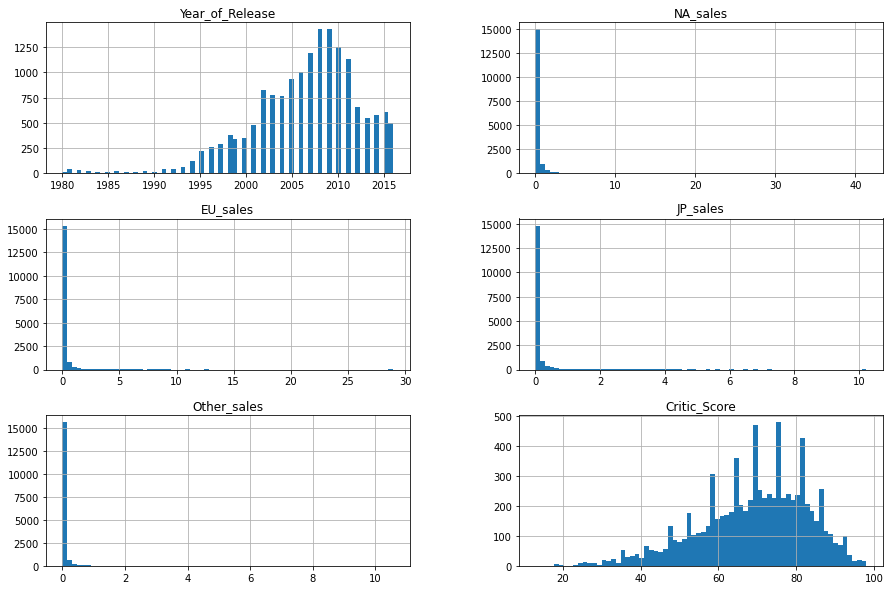

In [7]:
data.hist(bins = 70, figsize=(15, 10));

По предварительным графикам аномальных значений по столбцам не наблюдается. Предварительно можно сказать, что пик по реализам игр по всем платформам пришелся на 2008-2010 года. Продажи в разных регионах по большей части были в пределах до 2-3 млн копий, однако наблюдаются незначительные по кол-ву проданных копий до 30-40 млн. Стоит пункты по продажам по регионам изучить дополнительно. Оценки критиков построены на основании тока половины известных данных. Поэтому делать анализ на данный момент рано. Также отсутсвует график по оценкам пользователей, так как в столбце присутсвуют не только числовые значения.

**Вывод:**
Данным требуется предобработка. Необходимо некоторые столбцы перевести в нужный тип данных. Наблюдается несостыковка с количеством строк в некоторых столбцах, следовательно данные в них отсутсвуют. Необходимо данные также будет проверить на дубликаты. И провести анализ данных в столбцах с целью того, чтобы убедиться, что отсутсвуют в них аномалии. Также названия некоторых столбцов не написаны в хорошем стиле.

#  <a name="1">Шаг 2. Подготовка данных</a>

**Заменим названия столбцов (приведем к нижнему регистру);**


In [8]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
data.columns= data.columns.str.lower()

In [10]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Устранение пропусков**


Прежде чем приступать к устранению пропусков обратимся к найденному значению tbd в столбце user_score.

tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Т.е. значение подлежит уточнению. Следовательно информация на данный момент нам не известна. Следовательно можно считать, что у нас пустая строка. Поэтому присвоем данной ячейка значение Nan.


In [11]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.NaN
#data

**В столбце rating перезапишем значение с K-A на E**

In [12]:
data.loc[data['rating'] == 'K-A','rating'] = 'E'

**Выведим количество пропущенных значений для каждого столбца.**

In [13]:
# подсчёт пропусков и сортировка по убыванию пропусков

data.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Рассчитаем в процентном соотношение какую часть эти пропуски составляют от всех строк.

In [14]:
#Переведем в таблицу DataFrame информацию о количесве пропущенных строк в каждом столбце
data_nan_count =  (
    pd.DataFrame(
        data.isna().sum()
        .sort_values(ascending=False) 
        .reset_index())
)

In [15]:
#Переименование столбцов
data_nan_count.columns = ['name_column','nan_count']

Проведем расчет в каком процентном соотношение пропуски составляют от всех строк

In [16]:
#Создадим новый столбец 'f_%' 
data_nan_count['nan_%'] = (data_nan_count['nan_count']/len(data))*100

In [17]:
#Вывод столбцов в которых присутствуют пропуски
data_nan_count[data_nan_count['nan_count'] > 0]

,name_column,nan_count,nan_%
0,user_score,9125,54.591684
1,critic_score,8578,51.319174
2,rating,6766,40.478612
3,year_of_release,269,1.609333
4,name,2,0.011965
5,genre,2,0.011965


Наименьшее кол-во пропусков в столбце: **name**,**genre**,**year_of_release**. Значение в данный строках восстановить не получится. Данные пустые скорее всего или забыли указать или не знали на данный момент информацию и не стали ничего указывать. Так как данные составляют менее 2%, то удалим их из базы данных.

In [18]:
data = (
    data.dropna(subset=['name',
                        'genre',
                        'year_of_release'])
)

In [19]:
data.isna().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
rating             6676
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Наибольшее кол-во пропусков в столбцах: **critic_score**,**rating**,**user_score**. Пропусков 40-55%. 

С помощью библиотеки seaborn построим тепловую карту для визуализации данных.

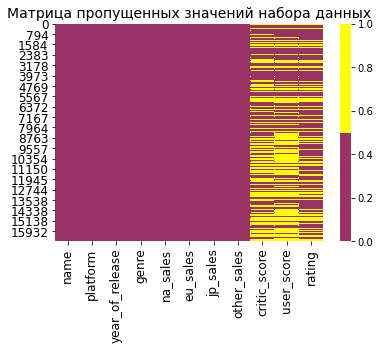

In [20]:
colours = ['#993366', '#FFFF00']
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Как можно наблюдать очень много пропусков в столбцах  **critic_score**,**rating**,**user_score**, что подтверждалось расчетами ранее.
Однако  тепловая карта показывает, что пропуски в данных столбцах во многих строк встречаются одновременно. Закономерность явная. Или значения целенаправленно пропускали, произошла потеря данных на этапе выгрузки датафрейма или не знали какие данные указывать. Возможно игры в данном сегменте в то время не имели рейтинг или очки критиков и пользователей или еще не получила оценку если игра вышла не давно. Необходимо взять данный момент на заметку.

Знаечния в столбцах **critic_score**,**user_score** будем заполнять медианным значением. Ранее был получено кол-во уникальных наименований игр в датафрейме. И было замечено, что уникальных наименований меньше, чем строк. Значит некоторые игры встречаются несколько раз и возможно помимо того, что это дупликаты возможно игры выходили на разных платформах. Значит можно для начала выполнить медианной заполнение очков от игроков и критиков по играм, которые встречаются более 1 раза.


Посчитаем сколько игр у нас встречается раз в списках. Выведим список на уменьшение.

In [21]:
name_unique = pd.DataFrame(data.groupby('name')['name']
                           .count()
                           .sort_values(ascending=False))

In [22]:
name_unique.columns = ['name_count']

In [23]:
name_unique = name_unique.reset_index()

In [24]:
name_unique

,name,name_count
0,Need for Speed: Most Wanted,12
1,FIFA 14,9
2,Ratatouille,9
3,LEGO Marvel Super Heroes,9
4,Cars,8
...,...,...
11421,In the Hunt,1
11422,Inazuma Eleven,1
11423,Inazuma Eleven 2,1
11424,Inazuma Eleven GO,1


In [25]:
len(name_unique['name'].unique())

11426

Рассмотри, что из себя представляют списки с первыми тремя играми: Need for Speed: Most Wanted, FIFA 14, Ratatouille 

In [26]:
data[(data['name'] == 'Need for Speed: Most Wanted')]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [27]:
data[data['name'] == 'FIFA 14']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


In [28]:
data[data['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,NaN,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,NaN,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


По рассмотренным таблицам видно, что попадаются игры с одинаковым названием, но выпущенные в разное время. К примеру, Need for Speed: Most Wanted. Поэтом при заполнении стоит учитывать еще и год издания игры. Так как игра в разные годы могла получить разное кол-во отзывов от игроков и критиков. Также наблюдается тенденция по Ratatouille и FIFA 14, что рейтинг у игр по всем платфорам практически одинаковый. Можно предположить, если в рассматриваемом диапазоне все значения кроме пустой строки имеют один и тот же рейтинг, то данной игре присвоим тот же рейтиннг. Если значений больше, то обозначим как "неизвестно"

Заполним все пустые строки значением "неизвестно"

In [29]:
data['critic_score'] = data['critic_score'].fillna('неизвестно')

In [30]:
data['user_score'] = data['user_score'].fillna('неизвестно')

In [31]:
data['rating'] = data['rating'].fillna('неизвестно')

In [32]:
#data.isna().sum().sort_values(ascending=False)

In [33]:
# проверим, что пустые строки заполнились.
data[(data['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,неизвестно,неизвестно,неизвестно
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,неизвестно,неизвестно,неизвестно
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,неизвестно,неизвестно,неизвестно
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Выполним заполнение медианной c учетом уникального имени игры и года когда она выходила. Также присвоим ей рейтинг, если выяснится, что все остальные строки имеют тот же рейтинг.

In [34]:
for i in name_unique.loc[name_unique['name_count'] >1, 'name'].unique():
    for j in data.loc[data['name'] == i, 'year_of_release'].unique():
        for k in ['critic_score','user_score']:
            data.loc[(data['name'] == i) & \
                         (data['year_of_release'] == j)& \
                         (data[k] == 'неизвестно'), \
                         k] = (data
                               .loc[(data['name'] == i) & \
                                    (data['year_of_release'] == j)& \
                                    (data[k] != 'неизвестно'), k]
                               .median()
                              )
     
        rating_unique = (data
                         .loc[(data['name'] == i) & \
                              (data['year_of_release'] == j)& \
                              (data['rating'] != 'неизвестно'), \
                              'rating']
                         .unique()
                        )
        if len(rating_unique) == 1:
            data.loc[(data['name'] == i) & \
                     (data['year_of_release'] == j)& \
                     (data['rating'] == 'неизвестно'), \
                     'rating'] = rating_unique[0]

In [35]:
#проверим на пустые строки
data.isna().sum().sort_values(ascending=False)

user_score         2230
critic_score       2150
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

Возникли пропуски. посмотрим, что у нас изменилось с данными в игре Need for Speed: Most Wanted и FIFA 14

In [36]:
data[(data['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,82.5,8.5,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,82.5,8.5,T
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,неизвестно
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [37]:
data[data['name'] == 'FIFA 14']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,87.0,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,87.0,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,87.0,4.3,E
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,87.0,3.4,E


В FIFA 14 все значения заполнены, а в Need for Speed: Most Wanted тоже все оснвоные заполнились, но возникли пустые строки, так как у данной игры был один год он же имел значение  'неизвестно'. Следовательно медианна не могла посчитаться и появилась пустая строка и в user_score и critic_score

Заполним оставшиеся пустые строки в user_score и critic_score значением "неизвестно", так как восстановить их не преставляет возможным.

In [38]:
data['critic_score'] = data['critic_score'].fillna('неизвестно')

In [39]:
#data.loc[data['critic_score'] == 'неизвестно',
#         'critic_score'] = (data
#                            .loc[data['critic_score'] != 'неизвестно',
#                                 'critic_score']
#                            .median()
#                           )


In [40]:
data['user_score'] = data['user_score'].fillna('неизвестно')

In [41]:
#data.loc[data['user_score'] == 'неизвестно',
#         'user_score'] = (data
#                            .loc[data['user_score'] != 'неизвестно',
#                                 'user_score']
#                            .median()
#                           )


In [42]:
#проверим на пустые строки
data.isna().sum().sort_values(ascending=False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

От пропусков всех избавились!

Поиск уникальных дупликатов

In [43]:
data.duplicated().sum()

0

Дупликаты отсутсвуют.

**Преобразование данных в нужный типы** 

Преобразуем столбец 'year_of_release' в 'int64'. А 'user_score' в 'float64'. Однаков в результате наших действий 'critic_score' стал 'object. Его необходимо перевести в 'float64'.

In [44]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [45]:
data.loc[data['user_score'] != 'неизвестно',
         'user_score'] = (data
                            .loc[data['user_score'] != 'неизвестно',
                                 'user_score']
                            .astype('float64')
                           )

In [46]:
data.loc[data['critic_score'] != 'неизвестно',
         'critic_score'] = (data
                            .loc[data['critic_score'] != 'неизвестно',
                                 'critic_score']
                            .astype('float64')
                           )

In [47]:
#ввыедим общую информацю
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [48]:
data['region_sum'] = (data['na_sales'] + \
                      data['eu_sales'] + \
                      data['jp_sales'] + \
                      data['other_sales']
                     )

In [49]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,неизвестно,неизвестно,неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,неизвестно,неизвестно,неизвестно,31.38


**Введем информацию о компании платформы. Данные запишем в отдельный столбец.**

In [50]:
def category_company(row):
    try:
        if row in ['Wii','NES','GB','DS','SNES','GBA','3DS','N64','WiiU','GC']:
            return 'Nintendo'
        elif row in ['XB','X360','XOne']:
            return 'Microsoft'
        elif row in ['PS3','PS2','PS4','PS','PSP','PSV']:
            return 'Sony'
        elif row == 'PC':
            return 'PC'
        elif row == '2600':
            return 'Atari'
        elif row in ['GEN','DC','SAT','SCD','GG']:
            return 'Sega'
        elif row == 'WS':
            return 'Bandai'
        elif row == '3DO':
            return 'Panasonic, Sanyo, Creative и Goldstar'
        else:
            return 'NEC'  
    except:
        pass
    
    

In [51]:
data['company'] = data['platform'].apply(category_company)

In [52]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum,company
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Nintendo
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,неизвестно,неизвестно,неизвестно,40.24,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,неизвестно,неизвестно,неизвестно,31.38,Nintendo


**Вывод:**

В данном шаге была выполнена подготовка данных к исследования.
В ходы подготовки было сделано:
1. перевод названий столбцов к нижнему регистру
2. присваение ячейке с **tbd** значение **Nan** в столбце **user_score**.
3. посчитано кол-во пропущенных строк и их процент от всех строк 

| Наименование столбца  | Кол-во пустых строк | Процент пустых строк |
| :---               | :----             | :---    |
| user_score         | 9125              | 54.591684 |
| critic_score       | 8578              | 51.319174 |
| rating             | 6766              | 40.478612 |
| year_of_release    | 269               | 1.609333 |
| name               | 2                 | 011965 |
| genre              | 2                 | 011965 |

4. пустые строки в столбцах **genre,name** и  **year_of_release** было принято решение удалить, так как их кол-во сотавляет менее 2% от общего числа пропущенных строк и восстановить их не представляет возможности. 
5. Пропущенные строки в **critic_score** и **user_score** устранили посчетом медианного значения по повторяющимся играм выпущенным на разных платформах и годах. Оставщиеся не обработанные пропуски в этих столбцах присовили "неизветсно". 
6. Пропущенные строки в rating была попытка устранить поиском игр выпущенных на нескольких платформах и сделав предположение, что на этой же платформе игре присвоили тот же рейтинг. Оставшимся пустым значениям присовили "неизветсно". Удалять строки не стали так как практически 6000 пустых строк отставалось, а это около 30-36% от всех строк в датасете.
7. также в в некоторых стобцах значениях перевели в нужный тип данных:
- **year_of_release** - значения перевели в int64
- **user_score** и **critic_score** значения, где нет пустых строк на всякий случай перевели в float64

Большая часть пропущенных строк наблюдалась в **user_score**, **critic_score** и **rating**. 
Взможные причины:
- человеческий фактор: забыли ввести значения, не захотели вводить значение или не знали какое-значение вводить, так как не обладали необходимой информацией
- не было информации по отзывам и рейтинга. возможно игра не получила еще их на момент составления базы данных. возможно некоторые игры появились до создания некоторых систем оценок.
Также наблюдалось по тепловой карте, что большая масса пропусков присутвует одновременно в в нескольких рассматриваемых столбцах.Необходимо взять данный момент на заметку. Возможно техническая ошибка.

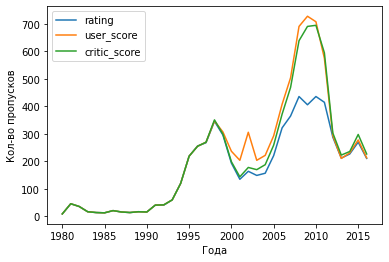

In [53]:
data[data['rating'] == 'неизвестно'].groupby('year_of_release')['rating'].count().plot()
data[data['user_score'] == 'неизвестно'].groupby('year_of_release')['user_score'].count().plot() 
data[data['critic_score'] == 'неизвестно'].groupby('year_of_release')['critic_score'].count().plot() 
plt.xlabel('Года')
plt.ylabel('Кол-во пропусков')
plt.legend()
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  region_sum       16444 non-null  float64
 12  company          16444 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.8+ MB


#  <a name="1">Шаг 3. Проведение исследовательского анализа данных</a>

**Задание.Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

Построим график распрделения кол-ва игр по годам.

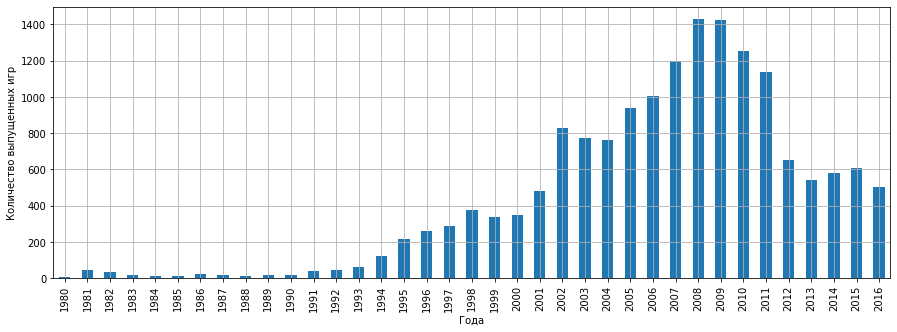

In [55]:
(data.groupby('year_of_release')['year_of_release']
 .count()
 .plot(kind='bar',
       figsize=(15,5),
      grid = True)
)
plt.xlabel('Года')
plt.ylabel('Количество выпущенных игр')
plt.show()

Основной рост кол-ва выпускающих игр начался с 1995 года. Пика достиг в 2008 году. Затем начался спад ориентировочно с 1400 до 500 игр в год. Заметно, что с 2012 по 2016 год выпуск игр в год варьируется в пределах 500-600 игр. Возможно к этим годам на рынке остались определнные платформы и на них только и выпускаются игры.

Посмотрим кол-во игра на каждой платформе в разные годы начиная с 1994 года. Возможно на такой рост кол-во игр повлияла популярность каких-то конкретных платформ, а спад пошел из-за смены поколений этих платформ или просто перестали платформу выпускать.

In [56]:
data_pivot_1 = (data[data['year_of_release'] >= 1994]
              .pivot_table(
                  index = ['year_of_release'],
                  columns = 'platform',
                  values = 'name',
                  aggfunc = ['count'])
             )

In [57]:
#data_pivot

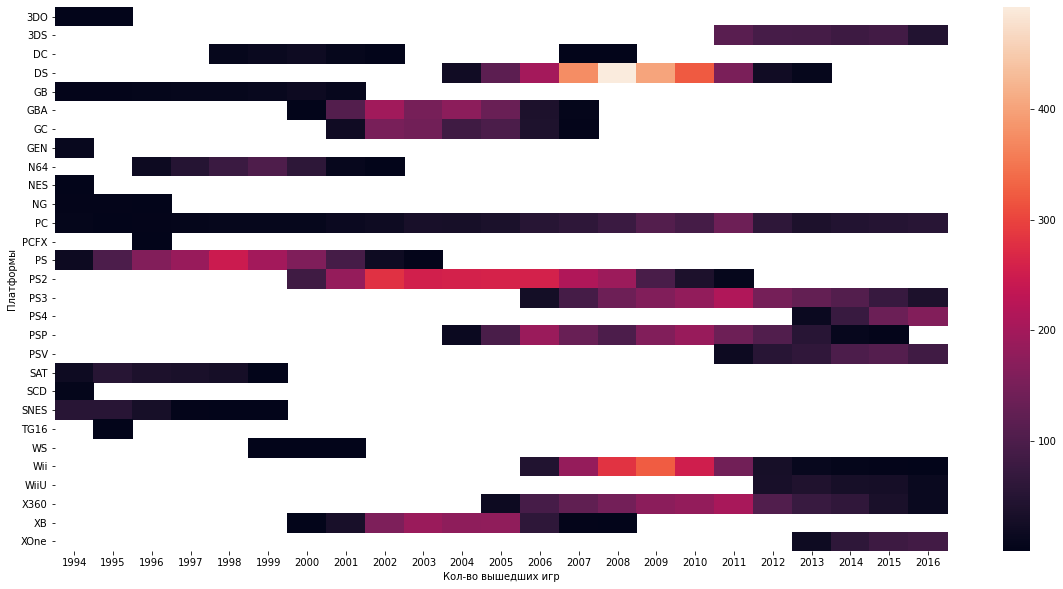

In [58]:
plt.figure(figsize = (20,10))
sns.heatmap(data_pivot_1['count'].T);
plt.xlabel('Кол-во вышедших игр')
plt.ylabel('Платформы')
plt.show()

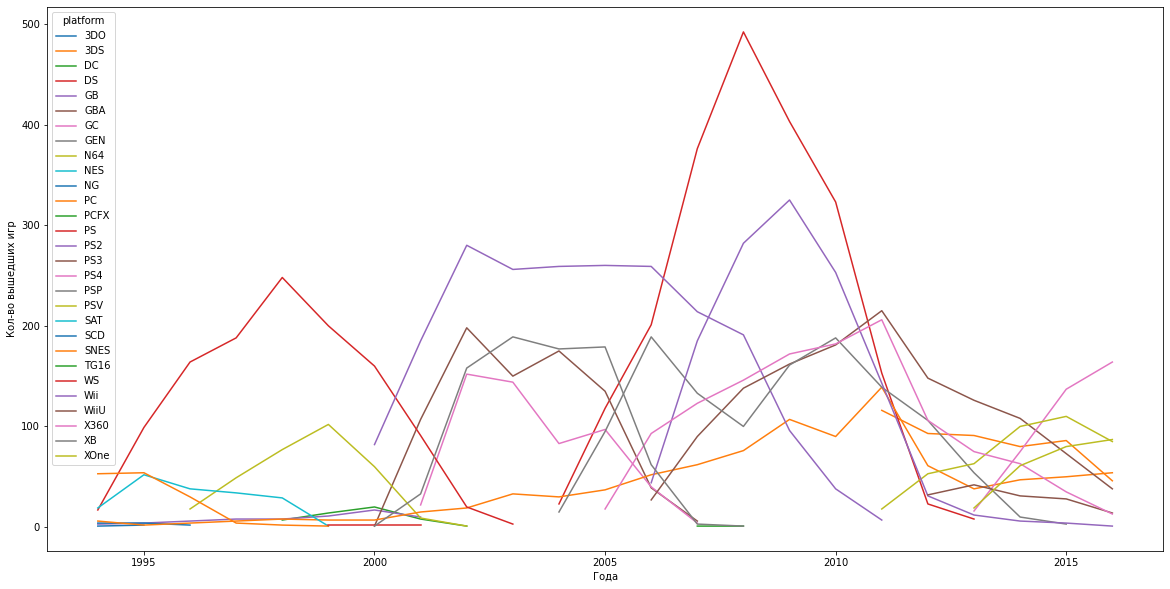

In [59]:
data_pivot_1['count'].plot(figsize = (20,10))
plt.xlabel('Года')
plt.ylabel('Кол-во вышедших игр')
plt.show()

Как можно наблюдать по двух графикам выше. С годами находились платформы которые давали аткивный прирост кол-во выпускаемых игр в год. 
так с 1994 по 2000 активно выпускали игры на платформе PS. Затем начался спад у данной платформы. Вероятно из-за того что произошла смена поклоений и вышла платформа PS2, которая и начала  вносить основной вклад в кол-во выпускаемых игр в год. Так платформа PS2 вплодь до 2006 года давала хороший прирост игр в рамках платформы и когда произошла смена на PS3 начался спад игр на платформе Ps2. В это время пока платформа PS3 был прирост игр у платформы DS, Wii, Xbox360. Причем первая в 2008 имела больше всего игр на своей платформе. Затем у всех платформ начинается спад кол-ва выпускаемых игр на их платформах. и новые платформы появившиеся  2014 года не дают особо активных успехов по выпуку игр на их платформах.

Посомтрим как у компаний с годами менятеся кол-во игр выпускаемых на их платформах

In [60]:
data_pivot_2 = (data[data['year_of_release'] >= 1994]
              .pivot_table(
                  index = ['year_of_release'],
                  columns = 'company',
                  values = 'name',
                  aggfunc = ['count'])
             )

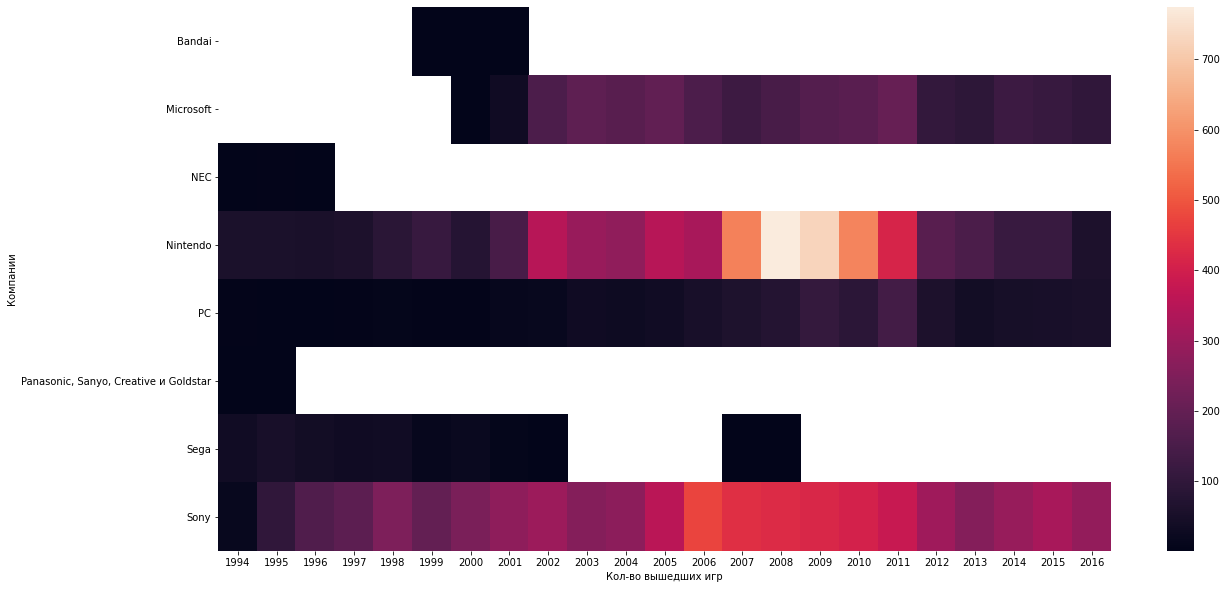

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(data_pivot_2['count'].T);
plt.xlabel('Кол-во вышедших игр')
plt.ylabel('Компании')
plt.show()

Как можно наблюдать оснвоными компаниями создающи платформы на которые выпускают игры являются Sony и Nintendo. При чем у Sony наблюдается достаточно хороший на протяжении всего рассматриваемого периода показатель кол-ва выпускаемых игр в год. У Nintendo мене стабильная ситуация. На данный момент наблюдается небольшой спад. Затема идет Mocrosoft.Явных ростов не наблюдается.Стабильные показатели. PC особо ничем не выделяется, хотя также находится на протяжении всего рассматриваемого периода. 

**Посмотрим, как менялись продажи по платформам по годам**

Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построем распределение по годам. 

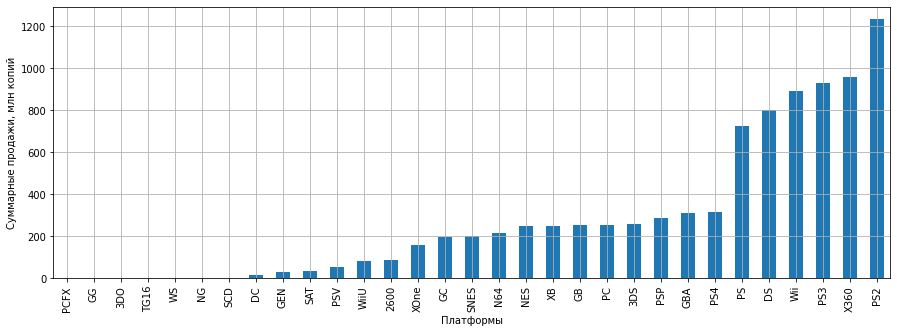

In [62]:
(data
 .groupby(['platform'])['region_sum']
 .sum().sort_values()
 .plot(kind='bar',
       figsize=(15,5),
       grid = True)
)

plt.xlabel('Платформы')
plt.ylabel('Cуммарные продажи, млн копий')
plt.show()

Наиболее высокие продажи у платформ: PS2, X360, PS3, Wii, DS, PS. посмотрим как у этих платформ с годами меняются суммарные продажи

In [63]:
pop_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

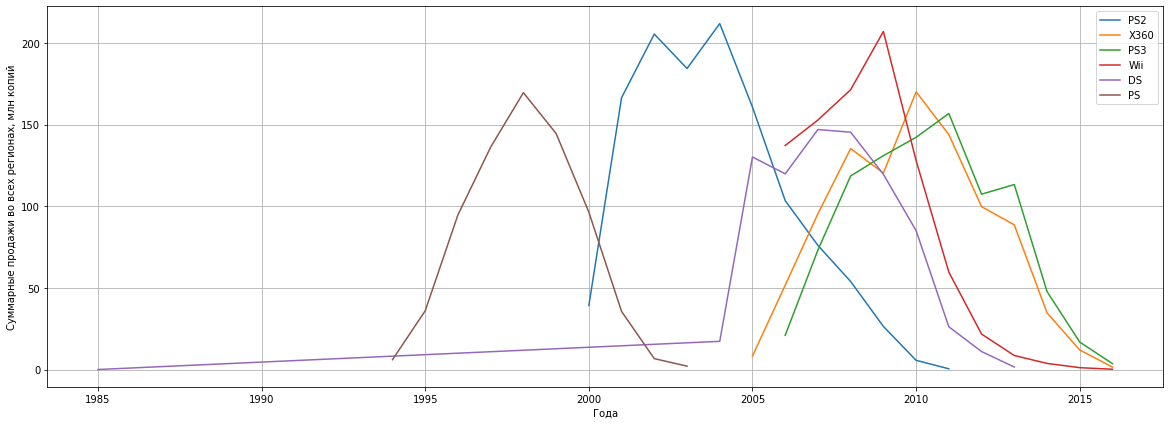

In [64]:
for i in pop_platform:
    (data[data['platform'] == i]
     .groupby('year_of_release')['region_sum']
     .sum()
     .plot(figsize = (20,7),
          grid = True)
    )

plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])
plt.xlabel('Года')
plt.ylabel('Cуммарные продажи во всех регионах, млн копий')
plt.show()

**За какой характерный срок появляются новые и исчезают старые платформы?**

По графикам можно сделать вывод, что платформы в среднем живут 8-10 лет. Новые платформы появляются в среднем через 6 лет после выхода предыдущей консоли.

**Возьмем данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.**

За актальный период примем 2013-2016 года. В 2013 появилась основная масса новых консолей и период их жизни еще не окончен и следовательно можно делать анализ по данных годам и в дальнейшем для 2017 года.

**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

Вычислим какие платформы лидируют по продажам

In [65]:
#выбираем список входящий в актуальный период
data_current = data[data['year_of_release'] >= 2013]

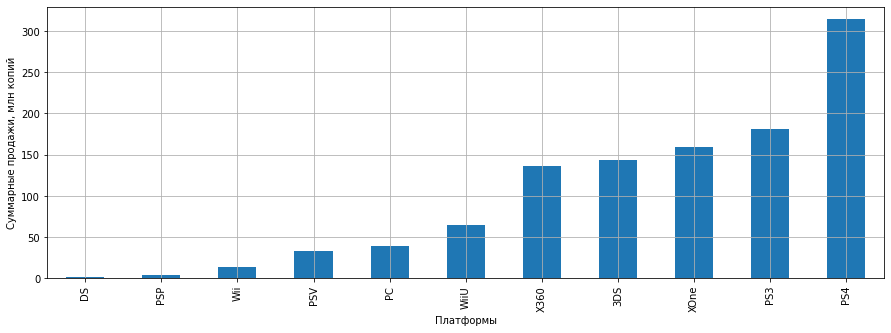

In [66]:
(data_current
 .groupby(['platform'])['region_sum']
 .sum().sort_values()
 .plot(kind='bar',
       figsize=(15,5),
       grid = True)
)

plt.xlabel('Платформы')
plt.ylabel('Cуммарные продажи, млн копий')
plt.show()

По гистограмме можно предаврительно выделить 5 платформ с хорошими продажами за этот период: 'PS4', 'PS3', 'XOne', '3DS', 'X360'.
Посомтрим какие платформы растут, а какие падают по продажам.

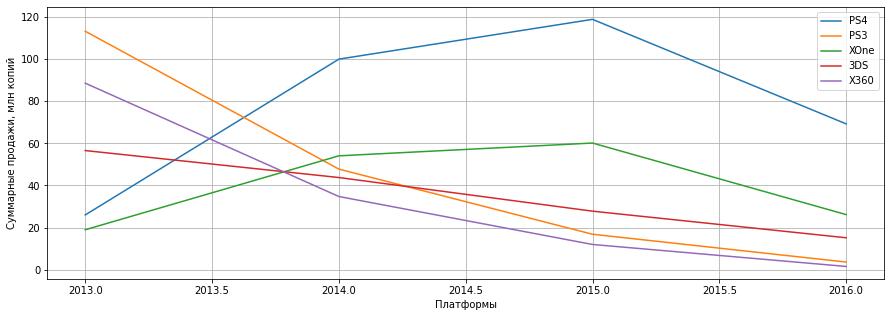

In [67]:
for i in ['PS4', 'PS3', 'XOne', '3DS', 'X360']:
    (
        data_current[data['platform'] == i]
        .groupby(['year_of_release'])['region_sum']
        .sum()
        .plot(figsize=(15,5),
              grid = True)
    )
plt.legend(['PS4', 'PS3', 'XOne', '3DS', 'X360'])
plt.xlabel('Платформы')
plt.ylabel('Cуммарные продажи, млн копий')
plt.show()

Платформы 'PS3', '3DS', 'X360' активно падают по продажам. Их период жизни подходит к концу. А платформы 'PS4','XOne' расли по продажам до 2015 года. После начали тоже падать. Но если учесть, что в среднем платформы живут 8-10 лет и новая консоль равз в 6 лет с начала выпуска, то до новой консоли еще 3 года и для анализа платформ на 2017 перспективно исслдеовать платформы 'PS4','XOne'.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

(-0.05, 2.0)

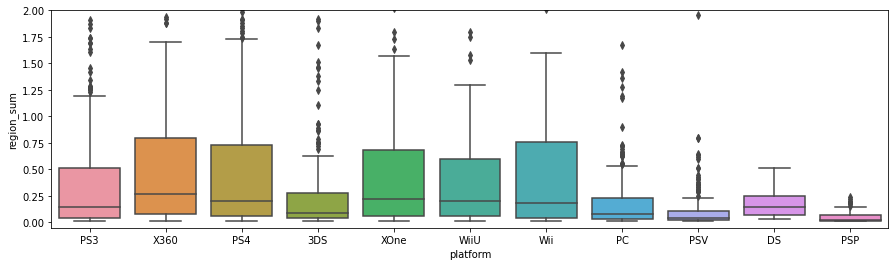

In [68]:
# построим диаграмму размаха
plt.figure(figsize=(15,4))
sns.boxplot(y = 'region_sum', x = 'platform', data = data_current);
#наблюдались выбросы до 16,5 млн. Ограничили по оси Оу до 2 
plt.ylim(bottom=-0.05, top=2)

In [69]:
data_current.groupby('platform')['region_sum'].describe().T

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,303.000000,8.000000,189.000000,345.000000,392.000000,67.000000,358.000000,23.000000,115.000000,186.000000,247.000000
mean,0.472772,0.192500,0.208624,0.525884,0.801378,0.052239,0.092151,0.593913,0.562000,0.735484,0.645020
std,1.381347,0.172026,0.352304,1.451939,1.609456,0.059768,0.153816,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


В многих платформах наблюдаются выбросы в сторону больших значений. Видно по самой диаграмме размаха и по смещенномому среднему значению. Предлагается выбросы оставить и не ограничивать в исследованиях, так как на аномальные продажи платформ могли повлиять игры выходящие на них.
Выбросы по значениям самые большие у PS3. Затем PS4, 3DSб, X360
Cреднее значение самое большое у платформы PS4. Затем у X360 и XOne

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

Выберем в качестве популярной платформы PS4.
Создадим функцию по построение и подсчету корреляции.

In [70]:
def platform_corr(platform):
    print('Платформа:',platform)
    #Расчет и построение корреляции critic_score и region_sum
    xy = ( data_current.loc[(data_current['platform'] == platform) 
                            & (data_current['critic_score'] != 'неизвестно'),
                            ['critic_score','region_sum']]
         ).astype('float64')
    
    sns.scatterplot(x=xy['critic_score'],
                    y=xy['region_sum'])
    
    plt.title(platform)
    plt.show()
    
    print('Корреляция region_sum c critic_score:',
          xy['critic_score'].corr(xy['region_sum']))
    
    
    #Расчет и построение корреляции user_score и region_sum
    xy = ( data_current.loc[(data_current['platform'] == platform) 
                            & (data_current['user_score'] != 'неизвестно'),
                            ['user_score','region_sum']]
         ).astype('float64')
    
    
    sns.scatterplot(x=xy['user_score'],
                    y=xy['region_sum'])
    
    plt.title(platform)
    plt.show()
    
    print('Корреляция region_sum c user_score:',
          xy['user_score'].corr(xy['region_sum']))
    print('')
    return
    

Платформа: PS4


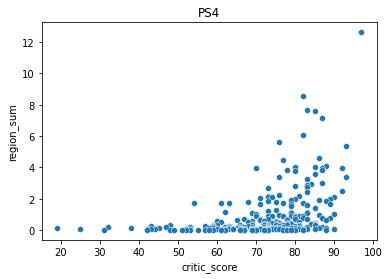

Корреляция region_sum c critic_score: 0.4047992794712883


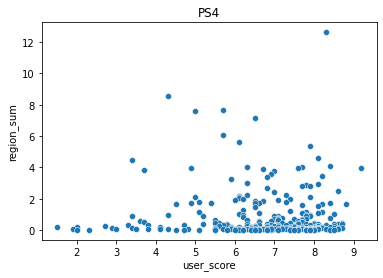

Корреляция region_sum c user_score: -0.025641106195529242



In [71]:
platform_corr('PS4')

Корреляция между продажами и отзывами пользователей: -0.025641106195529242

Корреляция между продажами и отзывами критиков: 0.4047992794712883

Корреляции слабые. Нельзя однозначно скзаать, что отзывы влияюют на продажи.

**Соотнесите выводы с продажами игр на других платформах.**

Рассмотрим как отзыввы влияли на наши предыдущие популярные платформы в выбранном актуальном временном промежутке.

Платформа: PS3


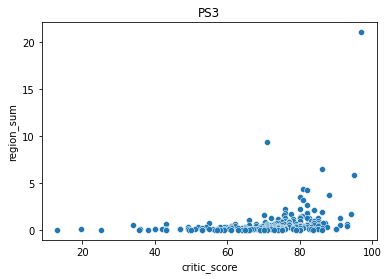

Корреляция region_sum c critic_score: 0.2891345604707434


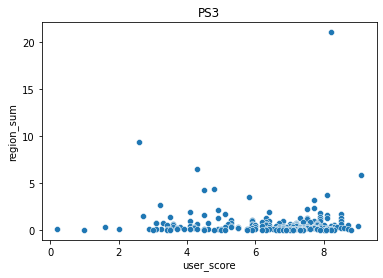

Корреляция region_sum c user_score: 0.006547169269796706

Платформа: XOne


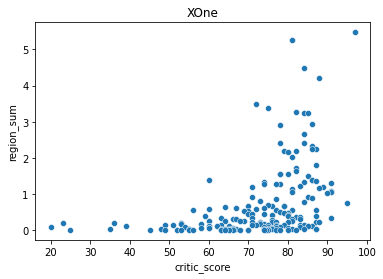

Корреляция region_sum c critic_score: 0.40833932917421434


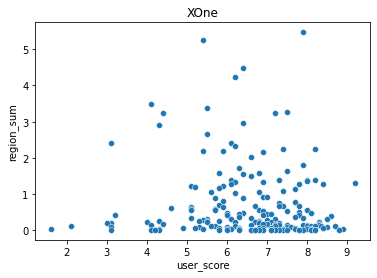

Корреляция region_sum c user_score: -0.07791949736332822

Платформа: 3DS


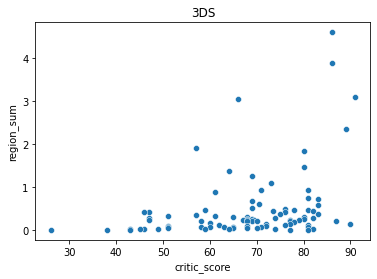

Корреляция region_sum c critic_score: 0.3387830502392223


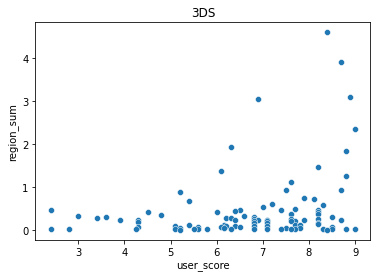

Корреляция region_sum c user_score: 0.29011980887300914

Платформа: X360


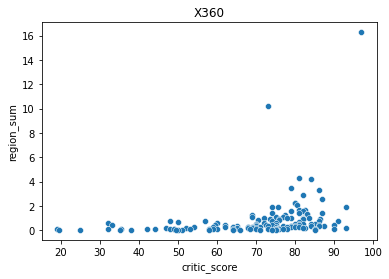

Корреляция region_sum c critic_score: 0.2902579376646436


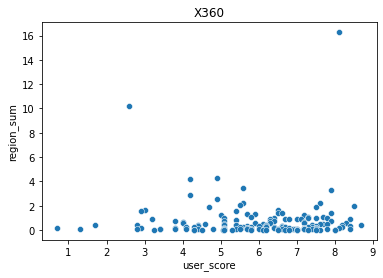

Корреляция region_sum c user_score: -0.011469275714327641



In [72]:
for i in ['PS3', 'XOne', '3DS', 'X360']:
    platform_corr(i)

Ситуация таже самая. Отзывы по играм слабо влияют на продажу игр на рассматриваемых консолях.

PS3 \
Корреляция region_sum c critic_score:  0.2891345604707434 \
Корреляция region_sum c user_score:  0.006547169269796706

XOne \
Корреляция region_sum c critic_score:  0.40833932917421434 \
Корреляция region_sum c user_score:  -0.07791949736332822

3DS \
Корреляция region_sum c critic_score:  0.3387830502392223 \
Корреляция region_sum c user_score:  0.29011980887300914

X360 \
Корреляция region_sum c critic_score:  0.2902579376646436 \
Корреляция region_sum c user_score:  -0.011469275714327641

В основном корреляция у отзывов критиков  с продажами положительная и в пределах 0.28-0.4
Корреляция у отзывов пользователей в соновном имеет отрицательный характер и значение около нулевое. Хотя ест исключение с вязанное с платформой 3DS. Там значеение 0.3.


Итог: отзывы мало влияют на покупку игр на платформы.

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Рассмотрим диаграмму размаха за актуальный период как продавались игры в разных жанрах на платформах за выбранный период.

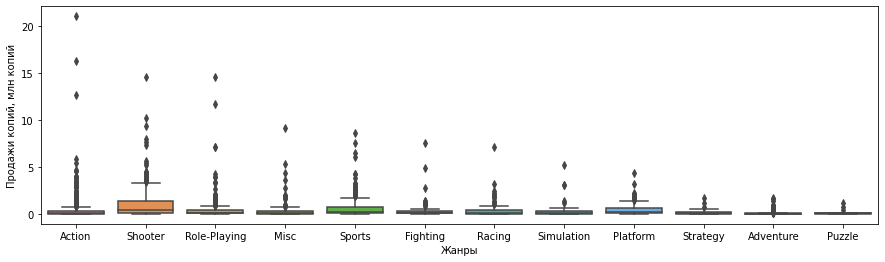

In [73]:
plt.figure(figsize=(15,4))
sns.boxplot(y = 'region_sum', x = 'genre', data = data_current)
plt.xlabel('Жанры')
plt.ylabel('Продажи копий, млн копий')
plt.show();

По диаграмме размаха можно выделить аномальные продажи у игр жанра Shooter, Role-Playing, Action, Misc, Sports.
Сложно по данной диаграмме оценивать средние продажи. Рассмотрим нашу диаграмму на участке продаж от 0 до 3.5 млн копий

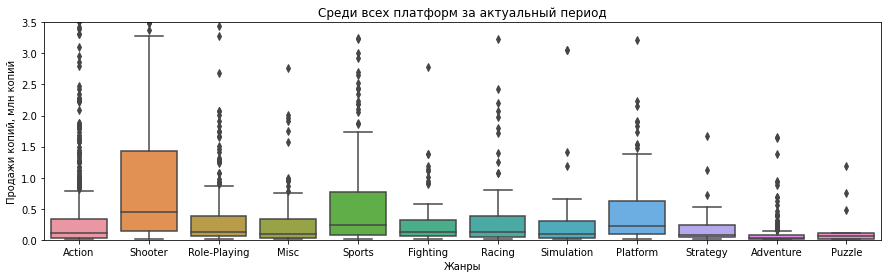

In [74]:
plt.figure(figsize=(15,4))
sns.boxplot(y = 'region_sum', x = 'genre', data = data_current)
plt.ylim(0, 3.5)
plt.title('Среди всех платформ за актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Продажи копий, млн копий')
plt.show();

Построим таблицу диграммы размаха

In [75]:
data_current.groupby('genre')['region_sum'].describe().T

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,766.000000,245.000000,80.000000,155.000000,74.000000,17.000000,85.000000,292.000000,187.000000,62.000000,214.000000,56.000000
mean,0.420196,0.096490,0.441375,0.405290,0.576081,0.186471,0.469294,0.499623,1.245882,0.350968,0.703972,0.180000
std,1.253909,0.216445,1.048883,1.007985,0.806808,0.325172,0.964101,1.353164,2.014107,0.849163,1.219237,0.279441
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.060000,0.030000,0.090000,0.020000,0.050000,0.060000,0.140000,0.030000,0.070000,0.040000
50%,0.110000,0.030000,0.125000,0.100000,0.225000,0.060000,0.120000,0.125000,0.450000,0.100000,0.240000,0.080000
75%,0.337500,0.070000,0.322500,0.330000,0.627500,0.110000,0.380000,0.382500,1.425000,0.295000,0.765000,0.232500
max,21.050000,1.660000,7.550000,9.180000,4.320000,1.190000,7.090000,14.600000,14.630000,5.220000,8.580000,1.670000


Построим гистограмму по средним суммам всех продаж по жанрам

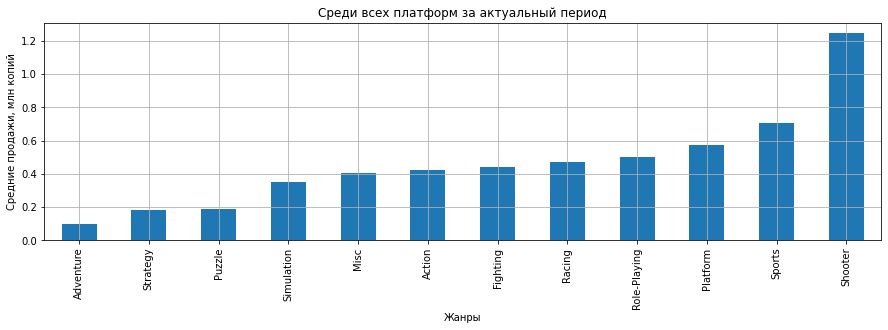

In [76]:
(data_current
 .groupby('genre')['region_sum']
 .mean().sort_values()
 .plot(kind='bar',
       figsize=(15,4),
       grid = True)
)
plt.title('Среди всех платформ за актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Средние продажи, млн копий')
plt.show()

По таблице размаха и по графику наблдается, что наилучше продажи среди всех платформ за акутальный период были у игр жанра (Топ-5): Shooter,Sports, Platform, Role-Playing, Racing.
Хуже продаются игры жанра Adventure.

Расссмотрим продажи по жанрам среди консоли XOne и PS4 за тот же период

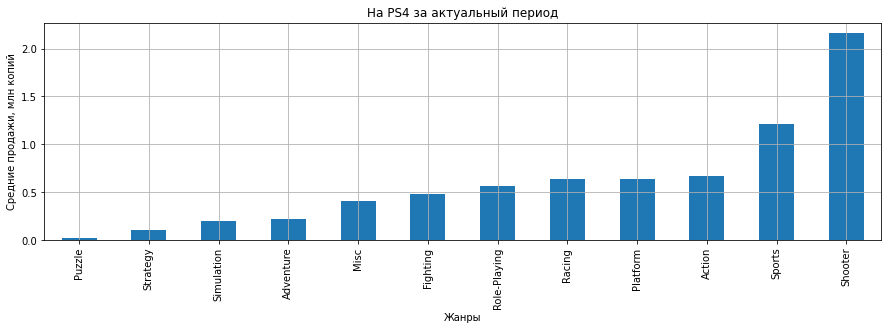

In [77]:
(data_current[data_current['platform'] == 'PS4']
 .groupby('genre')['region_sum']
 .mean().sort_values()
 .plot(kind='bar',
       figsize=(15,4),
       grid = True)
)

plt.title('На PS4 за актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Средние продажи, млн копий')
plt.show()

По графику наблдается, что наилучше продажи у PS4 за акутальный период были у игр жанра (Топ-5): Shooter,Sports, Action, Platform, Racing.
Хуже продаются игры жанра Puzzle.

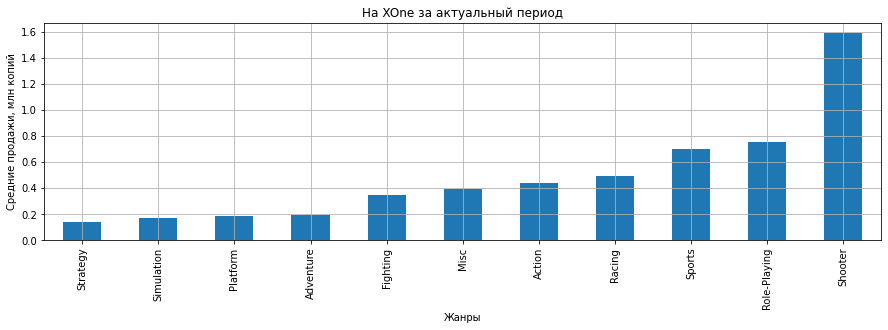

In [78]:
(data_current[data_current['platform'] == 'XOne']
 .groupby('genre')['region_sum']
 .mean().sort_values()
 .plot(kind='bar',
       figsize=(15,4),
       grid = True)
)
plt.title('На XOne за актуальный период')
plt.xlabel('Жанры')
plt.ylabel('Средние продажи, млн копий')
plt.show()

По графику наблдается, что наилучше продажи у XOne за акутальный период были у игр жанра (Топ-5): Shooter, Role-Playing, Sports,  Racing, Action.
Хуже продаются игры жанра Strategy.

**Выводы:**

В данном шаге было проведен исследовательский анализа данных.
Были поставлены следующие вопросы для анализа:

**1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

Основной рост кол-ва выпускающих игр начался с 1995 года. Было в начале 160 игр в год. Затем рост достиг пика в 1400 в 2008 году. Прирост ежегодно составлял 100-200 игр. Затем начался спад ориентировочно с 1400 до 500 игр в год. Заметно, что с 2012 по 2016 год выпуск игр в год варьируется в пределах 500-600 игр. Возможно к этим годам на рынке остались определнные платформы и на них только и выпускаются игры.
Все года для анализа для 2017 года нет смысла рассматривать. Наиболее перспекнивные 2013-2016 года, так как в это время появились нового поколения консоли, а сторого уже завершают свой цикл жизни. 

**2. Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы? Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

Можно  выделить 5 платформ с хорошими продажами за период 2013-2016: 'PS4', 'PS3', 'XOne', '3DS', 'X360'. 
Однако, платформы 'PS3', '3DS', 'X360' активно падают по продажам. Их период жизни подходит к концу. А платформы 'PS4','XOne' расли по продажам до 2015 года. После начали тоже падать. Но если учесть, что в среднем платформы живут 8-10 лет и новая консоль равз в 6 лет с начала выпуска, то до новой консоли еще 3 года и для анализа платформ на 2017 перспективно исследовать платформы 'PS4','XOne'.

**3. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.**

В многих платформах наблюдаются выбросы в сторону больших значений. Видно по самой диаграмме размаха и по смещенномому среднему значению. Предлагается выбросы оставить и не ограничивать в исследованиях, так как на аномальные продажи платформ могли повлиять игры выходящие на них.
Выбросы по значениям самые большие у PS3. Затем PS4, 3DSб, X360
Cреднее значение самое большое у платформы PS4. Затем у X360 и XOne

**4. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Соотнесем выводы с продажами игр на других платформах?**

В основном корреляция у отзывов критиков с продажами положительная и в пределах 0.28-0.4 Корреляция у отзывов пользователей в соновном имеет отрицательный характер и значение около нулевое. 

Можно сделать вывод, что отзывы на всех рассматриваемых платформах не сильно влияют на продади игр.


**5. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Наилучше продажи среди всех платформ за акутальный период были у игр жанра (Топ-5): Shooter,Sports, Platform, Role-Playing, Racing \
Самые высокие продажи у Shooter.\
Самые низкие продажи у Adventure.


Также рассмотрели как обстоят дела у перспективных платформ: PS4 и XOne.

Наилучше продажи у PS4 за акутальный период были у игр жанра (Топ-5): Shooter,Sports, Action, Platform, Racing. \
Хуже продаются игры жанра Puzzle.

По графику наблдается, что наилучше продажи у XOne за акутальный период были у игр жанра (Топ-5): Shooter, Role-Playing, Sports,  Racing, Action.\
Хуже продаются игры жанра Strategy.

#  <a name="1">Шаг 4. Составим портрет пользователя каждого региона</a>

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Составим портрет пользователя каждого региона за актуалный период (2013-2016 год)

Соpдадим фукнцию по расчету и построению графиков по топ-5 популярных платформ в разных регионах

In [79]:
def sales_platform(row,region):
    top = (
        row.groupby('platform')[region]
        .sum()
        .sort_values(ascending=False)
    )
    
    (
        top
        .plot(kind='pie',
              subplots=True, 
              figsize=(12,10),
              autopct='%1.1f%%')
    )
    plt.show()

    
    top = top.reset_index()
    top['sales_%'] =  (top[region]/top[region].sum())*100
    print(top)
        

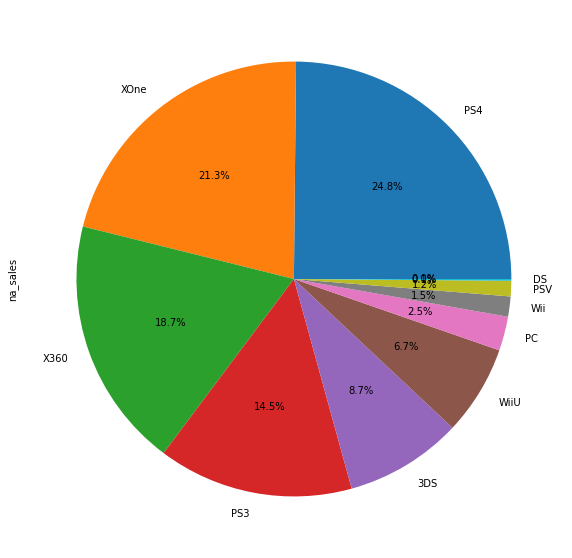

   platform  na_sales    sales_%
0       PS4    108.74  24.842933
1      XOne     93.12  21.274360
2      X360     81.66  18.656188
3       PS3     63.50  14.507322
4       3DS     38.20   8.727239
5      WiiU     29.21   6.673368
6        PC     11.11   2.538210
7       Wii      6.56   1.498709
8       PSV      5.04   1.151447
9        DS      0.57   0.130223
10      PSP      0.00   0.000000


In [80]:
# Американский регион
sales_platform(data_current,'na_sales')

В Америкe по продажам лидируют PS4 и Xone

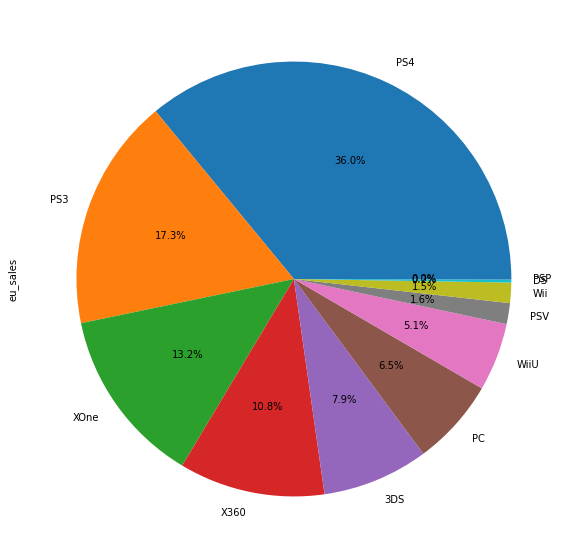

   platform  eu_sales    sales_%
0       PS4    141.09  35.971241
1       PS3     67.81  17.288326
2      XOne     51.59  13.152997
3      X360     42.52  10.840578
4       3DS     30.96   7.893328
5        PC     25.36   6.465594
6      WiiU     19.85   5.060806
7       PSV      6.10   1.555210
8       Wii      5.93   1.511868
9        DS      0.85   0.216710
10      PSP      0.17   0.043342


In [81]:
#Европейский регион
sales_platform(data_current,'eu_sales')

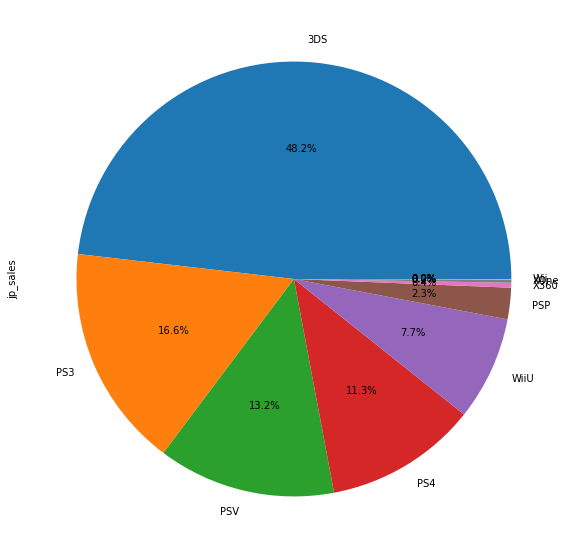

   platform  jp_sales    sales_%
0       3DS     67.81  48.167353
1       PS3     23.35  16.586163
2       PSV     18.59  13.205001
3       PS4     15.96  11.336838
4      WiiU     10.88   7.728371
5       PSP      3.29   2.336980
6      X360      0.51   0.362267
7      XOne      0.34   0.241512
8       Wii      0.05   0.035516
9        DS      0.00   0.000000
10       PC      0.00   0.000000


In [82]:
#Японский регион
sales_platform(data_current,'jp_sales')

Содадим фукнцию по расчету и построению графиков популярных жанров в регионах

In [83]:
def sales_genre(row,region):
    top = (
        row.groupby('genre')[region]
        .sum()
        .sort_values(ascending=False)
    )
    
    (
        top
        .plot(kind='pie',
              subplots=True, 
              figsize=(12,10),
              autopct='%1.1f%%')
    )
    plt.show()

    
    top = top.reset_index()
    top['sales_%'] =  (top[region]/top[region].sum())*100
    print(top)

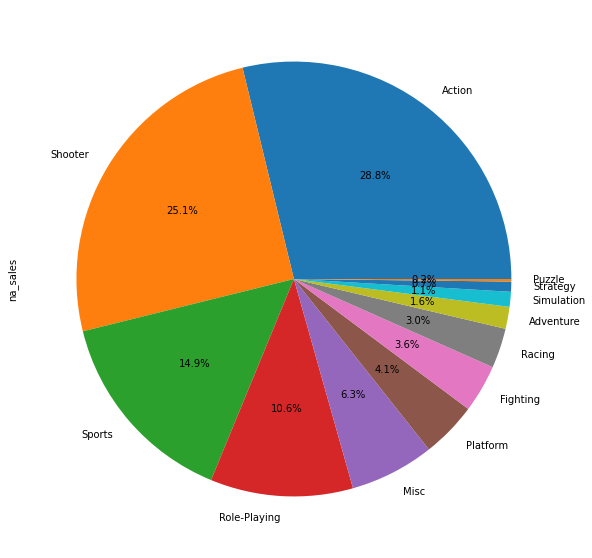

           genre  na_sales    sales_%
0         Action    126.05  28.797606
1        Shooter    109.74  25.071394
2         Sports     65.27  14.911700
3   Role-Playing     46.40  10.600626
4           Misc     27.49   6.280414
5       Platform     18.14   4.144296
6       Fighting     15.55   3.552580
7         Racing     12.96   2.960864
8      Adventure      7.14   1.631217
9     Simulation      4.86   1.110324
10      Strategy      3.28   0.749355
11        Puzzle      0.83   0.189623


In [84]:
# Американский регион
sales_genre(data_current,'na_sales')

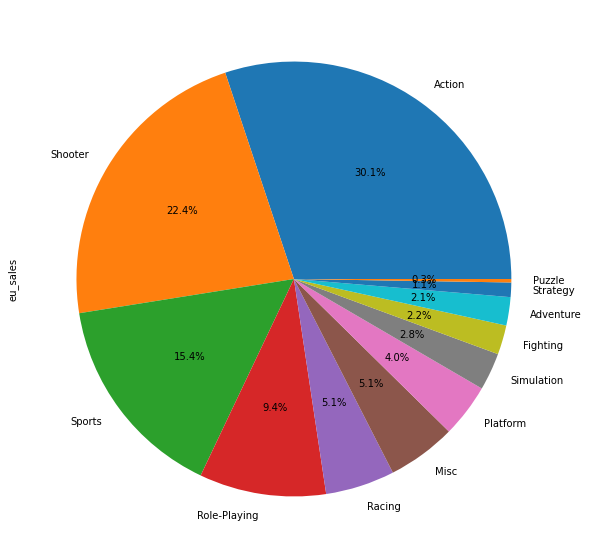

           genre  eu_sales    sales_%
0         Action    118.13  30.117533
1        Shooter     87.86  22.400122
2         Sports     60.52  15.429722
3   Role-Playing     36.97   9.425592
4         Racing     20.19   5.147490
5           Misc     20.04   5.109247
6       Platform     15.58   3.972159
7     Simulation     10.92   2.784081
8       Fighting      8.55   2.179843
9      Adventure      8.25   2.103358
10      Strategy      4.22   1.075899
11        Puzzle      1.00   0.254952


In [85]:
#Европейский регион
sales_genre(data_current,'eu_sales')

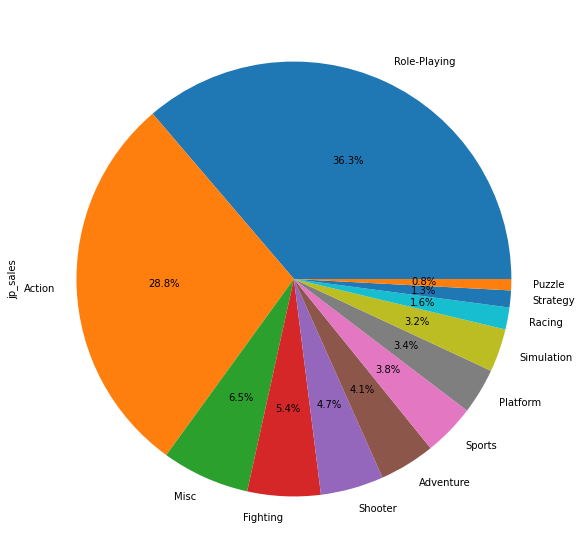

           genre  jp_sales    sales_%
0   Role-Playing     51.04  36.255150
1         Action     40.49  28.761188
2           Misc      9.20   6.535019
3       Fighting      7.65   5.434011
4        Shooter      6.61   4.695269
5      Adventure      5.82   4.134110
6         Sports      5.41   3.842875
7       Platform      4.79   3.402472
8     Simulation      4.52   3.210683
9         Racing      2.30   1.633755
10      Strategy      1.77   1.257281
11        Puzzle      1.18   0.838187


In [86]:
#Японский регион
sales_genre(data_current,'jp_sales')

Содадим фукнцию по расчету и построению графиков по расчету влияния рейтинга ESRB на продажи в отдельном регионе. 

In [105]:
def sales_esrb(row,region):       
    top = (row.
           groupby('rating')[region]
           .sum()
           .sort_values(ascending=False)
          )
    (top
    .plot(kind='pie',
          subplots=True, 
          figsize=(12,10),
          autopct='%1.1f%%')
    )
    
    plt.show()
    
    top = top.reset_index()
    top['sales_%'] =  (top[region]/top[region].sum())*100
    print(top)

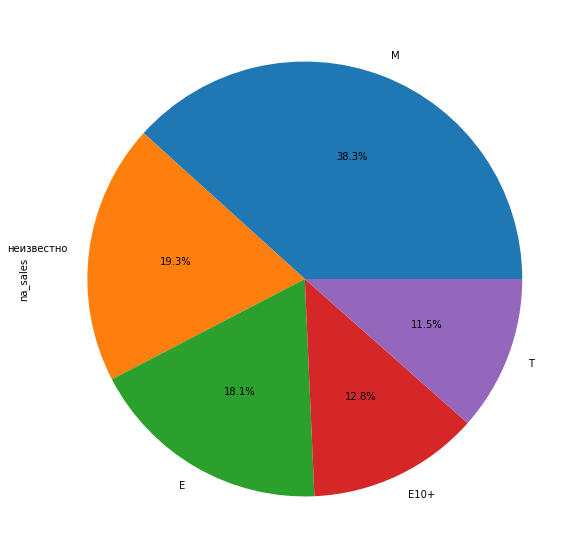

       rating  na_sales    sales_%
0           M    167.63  38.297046
1  неизвестно     84.64  19.337004
2           E     79.10  18.071326
3        E10+     55.86  12.761874
4           T     50.48  11.532750


In [106]:
# Американский регион
sales_esrb(data_current,'na_sales')

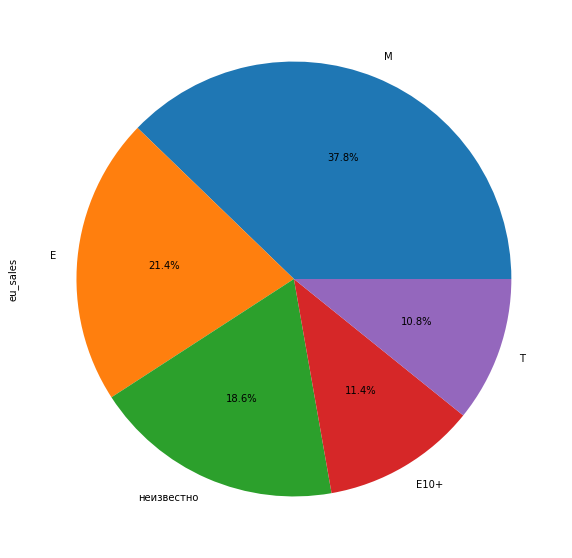

       rating  eu_sales    sales_%
0           M    148.16  37.773755
1           E     83.87  21.382862
2  неизвестно     73.01  18.614078
3        E10+     44.85  11.434617
4           T     42.34  10.794687


In [107]:
#Европейский регион
sales_esrb(data_current,'eu_sales')

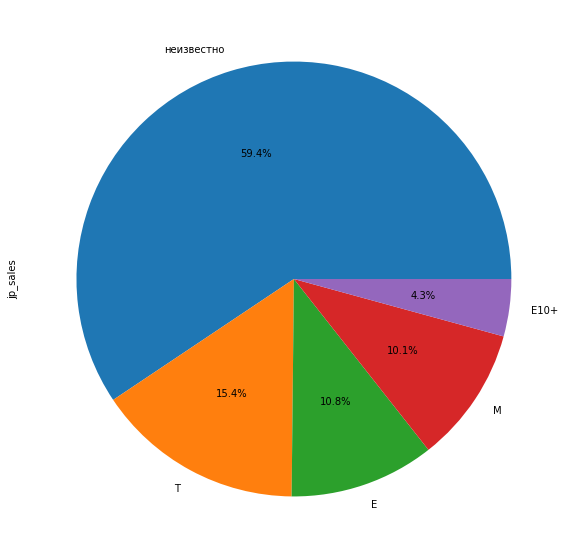

       rating  jp_sales    sales_%
0  неизвестно     83.60  59.383435
1           T     21.75  15.449638
2           E     15.18  10.782782
3           M     14.26  10.129280
4        E10+      5.99   4.254866


In [108]:
#Японский регион
sales_esrb(data_current,'jp_sales')

Во всех регионах выделяются игры с рейтингом: M,T,E,E10+ и "неизвестно".\
В американском регионе лидируют по продажам игры с рейтингом M.\
В европейском регионе лидируют по продажам игры с рейтингом тоже M.\
В японском регионе лидируют по продажам игры с рейтингом тоже "неизвестно" («RP» («Rating Pending») — «Рейтинг ожидается»).\

Что касается рейтинга "неизвестно". Особенно отчетливо видно в Японском сегменте. 
Так как организация ESRB больше создана для Американского и Канадского рынка, то вероятно игры с рейтингом "неизвестно" это с точки зрения данной организации рейтинг «RP» («Rating Pending») — «Рейтинг ожидается». Т.е. игры в японии вышли и вероятно это игры от местных разработчиков. Они пользуются популярностью и хорошо продаются. И вероятно разработчки подали  на полученяи рейтинга в ESRB и ожидают присвоения рейтинга, но при этом также продаются в других регионах, но уже в меньших кол-вах.

Тоже самое веротяно касается и европейского региона, но учитывая, что обычно европейский регион и на американскйи работает, то вреятноей игры не получили рейтинг, так как просто ожидают его присвоения.

**Вывод по 4 шагу.**

Составлен портрет пользователя для NA, EU, JP региона за 2013-2016 год:
1. Топ 5 платформ по регионам

| Американский регион (NA)  | Европейский регион (EU) | Японский регион (JP)|
| :---                   | :----                | :---    |
| PS4 (24.8%)            | PS4 (36%)            | 3DS (48.2%) |
| XOne (21.3%)           | PS3 (17.3%)          | PS3 (16.6%) |
| X360 (18.7%)           | XOne (13.2%)         | PSV (13.2%) |
| PS3 (14.5%)            | X360 (10.8%)         | PS4 (11.3%) |
| 3DS (8.72%)            | 3DS (7.9%)           | WiiU (7.7%) |
| Остальные (11.98%)      | Остальные (14.8%)     | Остальные (3.0%) |

Американский регион и европейский практически схожи по предпочтениям в платформах. 
Однако в американском преобладают больше PS4 и XOne и X360. А в европейском в основном PS4.
В японском регионе овсем иная картина. Там преобладает больше 3DS.

2. Топ 5 жанров по регионам

| Американский регион (NA)  | Европейский регион (EU) | Японский регион (JP)|
| :---                   | :----                | :---    |
| Action (28.8%)         | Action (30.1%)       | Role-Playing (36.3%) |
| Shooter (25.2%)        | Shooter (22.4%)      | Action (28.8%) |
| Sports (14.9%)         | Sports (15.4%)       | Misc (6.5%) |
| Role-Playing (10.6%)   | Role-Playing (9.4%)  | Fighting (5.4%) |
| Misc (6.3%)            | Racing (5.1%)        | Shooter (4.7%) |
| Остальные (14.2%)       | Остальные (17.6%)    | Остальные (18.3%) |

Американский регион и европейский практически схожи по предпочтениям в жанрах. Даже распределение между жанрами схожие по процентам. Из жанров преобладают  Action,Shooter, Sports.
В японском же регионе предпочтения отдают Role-Playing и Action


3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

| Рейтинг    | Американский регион (%) |  Рейтинг    | Европейский регион (%) |  Рейтинг    | Японский регион (%)    |
| :---      | :----                   | :----      | :----                  | :----      | :----                  | 
|  M        |     38.297046           |M           |37.773755               |неизвестно  |59.383435               |
|неизвестно |       19.337004         |E           |21.382862               |T           |15.449638               |
|  E        |      18.071326          |неизвестно  |18.614078               |E           |10.782782               |
|   E10+    |      12.761874          |E10+        |11.434617               |M           |10.129280               |
| T         |    11.532750            |T           |10.794687               |E10+        | 4.254866               |


Во всех регионах выделяются игры с рейтингом: M,T,E,E10+ и "неизвестно".\
В американском регионе лидируют по продажам игры с рейтингом M.\
В европейском регионе лидируют по продажам игры с рейтингом тоже M.\
В японском регионе лидируют по продажам игры с рейтингом тоже "неизвестно" («RP» («Rating Pending») — «Рейтинг ожидается»).\

Что касается рейтинга "неизвестно". Особенно отчетливо видно в Японском сегменте. 
Так как организация ESRB больше создана для Американского и Канадского рынка, то вероятно игры с рейтингом "неизвестно" это с точки зрения данной организации рейтинг «RP» («Rating Pending») — «Рейтинг ожидается». Т.е. игры в японии вышли и вероятно это игры от местных разработчиков. Они пользуются популярностью и хорошо продаются. И вероятно разработчки подали  на полученяи рейтинга в ESRB и ожидают присвоения рейтинга, но при этом также продаются в других регионах, но уже в меньших кол-вах.

Тоже самое веротяно касается и европейского региона, но учитывая, что обычно европейский регион и на американскйи работает, то вреятноей игры не получили рейтинг, так как просто ожидают его присвоения.


#  <a name="1">Шаг 5. Проверка гипотезы</a>

**Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**


`H_0: Средний пользовательский рейтинг (user_score) платформы "XOne" = Средний пользовательский рейтинг (user_score) платформы "PC"`

`H_a: Средний пользовательский рейтинг (user_score) платформы "XOne" ≠ Средний пользовательский рейтинг (user_score) платформы "PC"`

`alpha = 0.05`


Необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.
Для проверки данной гипотезы применим метод scipy.stats.ttest_ind()
Проверим равны ли совокупности и вычислим их средние значения.

In [91]:
print('кол-во выборок в рейтинге с платформой XOne',
      len(data_current[data_current['user_score'] != 'неизвестно']
          .loc[data_current['platform'] == 'XOne','user_score']))
print('кол-во выборок в рейтинге с платформой PC',
      len(data_current[data_current['user_score'] != 'неизвестно']
          .loc[data_current['platform'] == 'PC','user_score']))

кол-во выборок в рейтинге с платформой XOne 191
кол-во выборок в рейтинге с платформой PC 157


(-0.05, 10.0)

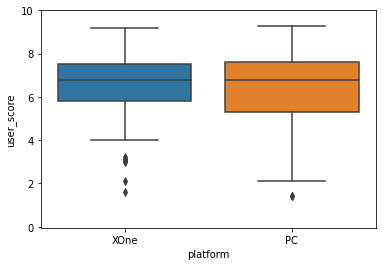

In [92]:
# построим диаграмму размаха
sns.boxplot(y = 'user_score',
            x = 'platform',
            data = data_current[data_current['user_score'] != 'неизвестно']
            .loc[(data_current['platform'] == 'XOne')
                 |(data_current['platform'] == 'PC')]);
plt.ylim(bottom=-0.05, top=10)

Так как кол-во выборо у нас практически одианковое, но кол-во выборок малое, то в методе все же будем использовать дополнительный параметр equal_var = False. По графику кажется, что пользовательские отзывы приблизительно равны. Проверим гипотезу! 

In [93]:
# results = вызов метода для проверки гипотезы
alpha = 0.05

results = st.ttest_ind(
    data_current.
    loc[(data_current['platform'] == 'XOne') 
        & (data_current['user_score'] != 'неизвестно'),
        'user_score']
    .astype('float64'), 
    
    data_current
    .loc[(data_current['platform'] == 'PC') 
         & (data_current['user_score'] != 'неизвестно'),
         'user_score']
    .astype('float64'),
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.09132809747288857
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 9%, что выше нашего порога.

**Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

В качестве нулевой сделаем условие, что они равны, так как положено, чтобы нулевая гипотека равнялась занчению

`H_0: Средний пользовательский рейтинг (user_score) жанра "Action" и  "Sports" равны`

`H_a: Средний пользовательский рейтинг (user_score) жанра  "Action" и "Sports" не равны`

`alpha = 0.05`


Нам необходимо проверить гипотезу о равенстве средних двух генеральных совокупностей.
Для проверки данной гипотезы применим метод scipy.stats.ttest_ind()
Проверим равны ли совокупности и вычислим их средние значения.

In [94]:
print('кол-во выборок в рейтинге с платформой Action',
      len(data_current[data_current['user_score'] != 'неизвестно']
          .loc[data_current['genre'] == 'Action','user_score']))
print('кол-во выборок в рейтинге с платформой Sports',
      len(data_current[data_current['user_score'] != 'неизвестно']
          .loc[data_current['genre'] == 'Sports','user_score']))

кол-во выборок в рейтинге с платформой Action 426
кол-во выборок в рейтинге с платформой Sports 180


(-0.05, 10.0)

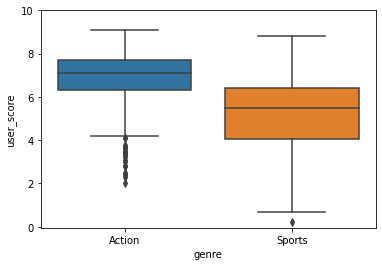

In [95]:
# построим диаграмму размаха
sns.boxplot(y = 'user_score',
            x = 'genre',
            data = data_current[data_current['user_score'] != 'неизвестно']
            .loc[(data_current['genre'] == 'Action')
                 |(data_current['genre'] == 'Sports')]);
plt.ylim(bottom=-0.05, top=10)

Так как кол-во выборок у нас значительно разное между жанрами, то в методе будем использовать дополнительный параметр equal_var = False. По графику наблюдается, что пользовательские отзывы чильно арзличаются. Проверим гипотезу! 

In [96]:
# results = вызов метода для проверки гипотезы
alpha = 0.05


results = st.ttest_ind(
    data_current.
    loc[(data_current['genre'] == 'Action') 
        & (data_current['user_score'] != 'неизвестно'),
        'user_score']
    .astype('float64'), 
    
    data_current
    .loc[(data_current['genre'] == 'Sports') 
         & (data_current['user_score'] != 'неизвестно'),
         'user_score']
    .astype('float64'),
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  5.7238135208703805e-24
Отвергаем нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 5.7238135208703805e-22%, что меньше нашего порога.

**Вывод:**

В первой гипотезе: Не получилось отвергнуть нулевую гипотезу\
p-значение: 0.09132809747288857

Во второй гипотезе: Отвергаем нулевую гипотезу\
p-значение: 5.7238135208703805e-24

#  <a name="1">Шаг 6. Общий вывод</a>

**Общий вывод**

Было проведено  исследование для интернет-магазина, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Были представлены данные до декабря 2016 года. Необходимо было спланировать кампанию на 2017-й. 

Для выполнения данного исследования были выплнены следующие шаги:

**- Шаг 1. Изучена общая информация**
В таблице 11 столбцов и 16715 строк.

Описание данных:
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например:
- **«EC» («Early childhood») — «Для детей младшего возраста»**
- **«E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")**
- **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**
- **«T» («Teen») — «Подросткам»**
- **«M» («Mature») — «Для взрослых»**
- **«AO» («Adults Only 18+») — «Только для взрослых»**
- **«RP» («Rating Pending») — «Рейтинг ожидается»**
- **«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»** Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

В столбце **Platform** выведены сокращенные названия игровых платформ:
 - Wii - консоль фирмы Nintendo
 - NES - Nintendo Entertainment System (NES). Консоль фирмы Nintendo
 - GB - Game Boy. Консоль фирмы Nintendo
 - DS - Nintendo DS (сокращённо NDS либо DS). Консоль фирмы Nintendo
 - X360 - Xbox 360. Игровая приставка компании Microsoft
 - PS3 - PlayStation 3. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - PS2 - PlayStation 2. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - SNES - Super Nintendo Entertainment System (также известная как Super Nintendo, Super NES и SNES).Консоль фирмы Nintendo
 - GBA - Game Boy Advance. Консоль фирмы Nintendo
 - PS4 - PlayStation 4. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - 3DS - Nintendo 3DS. Консоль фирмы Nintendo
 - N64 - Nintendo 64, также Ultra 64 и N64. Игровая приставка фирмы Nintendo
 - PS - PlayStation. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - XB - Xbox. Игровая приставка компании Microsoft
 - PC - PC game или игра для персонального компьютера.
 - 2600 - Atari VCS, позже названная Atari 2600. Игровая приставка фирмы Atari 
 - PSP - PlayStation Portable. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - XOne - Xbox One. Игровая приставка компании Microsoft
 - WiiU - Wii U. Консоль фирмы Nintendo
 - GC - Nintendo GameCube. Консоль фирмы Nintendo
 - GEN - Sega Mega Drive или Sega Genesis. Игровая приставка компании Sega
 - DC - Dreamcast.  Игровая приставка компании Sega
 - PSV - PlayStation Vita, PS Vita. Игровая приставка компании Sony Computer Entertainment (сокр. Sony)
 - SAT - Sega Saturn. Игровая приставка компании Sega
 - SCD - Sega Mega-CD. Игровая приставка компании Sega
 - WS - WonderSwan. Игровая приставка компании Bandai
 - NG - Neo-Geo. Игровая приставка компании SNK Playmore
 - TG16 - TurboGrafx-16. Компания NEC
 - 3DO - 3DO Interactive Multiplayer. Выпущена компаниями Panasonic, Sanyo, Creative и Goldstar (Сокр. до Panasonic)
 - GG - Game Gear. Игровая приставка компании Sega
 - PCFX - PC-FX — 32-разрядная игровая консоль, разработанная компанией NEC.



Данным требуется предобработка. Необходимо некоторые столбцы перевести в нужный тип данных. Наблюдается несостыковка с количеством строк в некоторых столбцах, следовательно данные в них отсутсвуют. Необходимо данные также будет проверить на дубликаты. И провести анализ данных в столбцах с целью того, чтобы убедиться, что отсутсвуют в них аномалии.


**- Шаг 2. Подготовка данных**

В данном шаге была выполнена подготовка данных к исследования.
В ходы подготовки было сделано:
1. перевод названий столбцов к нижнему регистру
2. присваение ячейке с **tbd** значение **Nan** в столбце **user_score**.
3. посчитано кол-во пропущенных строк и их процент от всех строк 

| Наименование столбца  | Кол-во пустых строк | Процент пустых строк |
| :---               | :----             | :---    |
| user_score         | 9125              | 54.591684 |
| critic_score       | 8578              | 51.319174 |
| rating             | 6766              | 40.478612 |
| year_of_release    | 269               | 1.609333 |
| name               | 2                 | 011965 |
| genre              | 2                 | 011965 |

4. пустые строки в столбцах **genre,name** и  **year_of_release** было принято решение удалить, так как их кол-во сотавляет менее 2% от общего числа пропущенных строк и восстановить их не представляет возможности. 
5. Пропущенные строки в **critic_score** и **user_score** устранили посчетом медианного значения по повторяющимся играм выпущенным на разных платформах и годах. Оставщиеся не обработанные пропуски в этих столбцах заменили медианным столбца. 
6. Пропущенные строки в rating была попытка устранить поиском игр выпущенных на нескольких платформах и сделав предположение, что на этой же платформе игре присвоили тот же рейтинг. Оставшимся пустым значениям присовили "неизветсно". Удалять строки не стали так как практически 6000 пустых строк отставалось, а это около 30-36% от всех строк в датасете.
7. также в в некоторых стобцах значениях перевели в нужный тип данных:
- **year_of_release** - значения перевели в int64
- **user_score** значения перевели в float64

Большая часть пропущенных строк наблюдалась в **user_score**, **critic_score** и **rating**. 
Взможные причины:
- человеческий фактор: забыли ввести значения, не захотели вводить значение или не знали какое-значение вводить, так как не обладали необходимой информацией
- не было информации по отзывам и рейтинга. возможно игра не получила еще их на момент составления базы данных. возможно некоторые игры появились до создания некоторых систем оценок.
Также наблюдалось по тепловой карте, что большая масса пропусков присутвует одновременно в в нескольких рассматриваемых столбцах.Необходимо взять данный момент на заметку. Возможно техническая ошибка.


**- Шаг 3. Проведен исследовательский анализ данных**

- 1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Основной рост кол-ва выпускающих игр начался с 1995 года. Было в начале 160 игр в год. Затем рост достиг пика в 1400 в 2008 году. Прирост ежегодно составлял 100-200 игр. Затем начался спад ориентировочно с 1400 до 500 игр в год. Заметно, что с 2012 по 2016 год выпуск игр в год варьируется в пределах 500-600 игр. Возможно к этим годам на рынке остались определнные платформы и на них только и выпускаются игры.
Все года для анализа для 2017 года нет смысла рассматривать. Наиболее перспекнивные 2013-2016 года, так как в это время появились нового поколения консоли, а сторого уже завершают свой цикл жизни. 

- 2. Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы? Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Можно  выделить 5 платформ с хорошими продажами за период 2013-2016: 'PS4', 'PS3', 'XOne', '3DS', 'X360'. 
Однако, платформы 'PS3', '3DS', 'X360' активно падают по продажам. Их период жизни подходит к концу. А платформы 'PS4','XOne' расли по продажам до 2015 года. После начали тоже падать. Но если учесть, что в среднем платформы живут 8-10 лет и новая консоль равз в 6 лет с начала выпуска, то до новой консоли еще 3 года и для анализа платформ на 2017 перспективно исследовать платформы 'PS4','XOne'.

- 3. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

В многих платформах наблюдаются выбросы в сторону больших значений. Видно по самой диаграмме размаха и по смещенномому среднему значению. Предлагается выбросы оставить и не ограничивать в исследованиях, так как на аномальные продажи платформ могли повлиять игры выходящие на них.
Выбросы по значениям самые большие у PS3. Затем PS4, 3DSб, X360
Cреднее значение самое большое у платформы PS4. Затем у X360 и XOne

- 4. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Соотнесите выводы с продажами игр на других платформах?

В основном корреляция у отзывов критиков с продажами положительная и в пределах 0.28-0.4 Корреляция у отзывов пользователей в соновном имеет отрицательный характер и значение около нулевое. 

Можно сделать вывод, что отзывы на всех рассматриваемых платформах не сильно влияют на продади игр.


- 5. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? 


Топ 5 жанров игр по продажам за актуальный период:

| Все платформы   | PS4         | XOne|
| :---           | :----       | :---    |
| Shooter        | Shooter     | Shooter |
| Sports         | Sports      | Role-Playing |
| Platform       | Action      | Sports |
| Role-Playing   | Platform    | Racing |
| Racing         | Racing      | Action |

Хужу всего продаются :

| Все платформы   | PS4         | XOne|
| :---           | :----       | :---    |
| Adventure        | Puzzle     | Strategy |


**- Шаг 4. Составлен портрет пользователя каждого региона**

Составлен портрет пользователя для NA, EU, JP региона за 2013-2016 год:
- 1. Топ 5 платформ по регионам

| Американский регион (NA)  | Европейский регион (EU) | Японский регион (JP)|
| :---                   | :----                | :---    |
| PS4 (24.8%)            | PS4 (36%)            | 3DS (48.2%) |
| XOne (21.3%)           | PS3 (17.3%)          | PS3 (16.6%) |
| X360 (18.7%)           | XOne (13.2%)         | PSV (13.2%) |
| PS3 (14.5%)            | X360 (10.8%)         | PS4 (11.3%) |
| 3DS (8.72%)            | 3DS (7.9%)           | WiiU (7.7%) |
| Остальные (11.98%)      | Остальные (14.8%)     | Остальные (3.0%) |

Американский регион и европейский практически схожи по предпочтениям в платформах. 
Однако в американском преобладают больше PS4 и XOne и X360. А в европейском в основном PS4.
В японском регионе овсем иная картина. Там преобладает больше 3DS.

- 2. Топ 5 жанров по регионам

| Американский регион (NA)  | Европейский регион (EU) | Японский регион (JP)|
| :---                   | :----                | :---    |
| Action (28.8%)         | Action (30.1%)       | Role-Playing (36.3%) |
| Shooter (25.2%)        | Shooter (22.4%)      | Action (28.8%) |
| Sports (14.9%)         | Sports (15.4%)       | Misc (6.5%) |
| Role-Playing (10.6%)   | Role-Playing (9.4%)  | Fighting (5.4%) |
| Misc (6.3%)            | Racing (5.1%)        | Shooter (4.7%) |
| Остальные (14.2%)       | Остальные (17.6%)      | Остальные (18.3%) |

Американский регион и европейский практически схожи по предпочтениям в жанрах. Даже распределение между жанрами схожие по процентам. Из жанров преобладают  Action,Shooter, Sports.
В японском же регионе предпочтения отдают Role-Playing и Action


- 3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

| Рейтинг    | Американский регион (%) |  Рейтинг    | Европейский регион (%) |  Рейтинг    | Японский регион (%)    |
| :---      | :----                   | :----      | :----                  | :----      | :----                  | 
|  M        |     38.297046           |M           |37.773755               |неизвестно  |59.383435               |
|неизвестно |       19.337004         |E           |21.382862               |T           |15.449638               |
|  E        |      18.071326          |неизвестно  |18.614078               |E           |10.782782               |
|   E10+    |      12.761874          |E10+        |11.434617               |M           |10.129280               |
| T         |    11.532750            |T           |10.794687               |E10+        | 4.254866               |


Во всех регионах выделяются игры с рейтингом: M,T,E,E10+ и "неизвестно".\
В американском регионе лидируют по продажам игры с рейтингом M.\
В европейском регионе лидируют по продажам игры с рейтингом тоже M.\
В японском регионе лидируют по продажам игры с рейтингом тоже "неизвестно" («RP» («Rating Pending») — «Рейтинг ожидается»).\

Что касается рейтинга "неизвестно". Особенно отчетливо видно в Японском сегменте. 
Так как организация ESRB больше создана для Американского и Канадского рынка, то вероятно игры с рейтингом "неизвестно" это с точки зрения данной организации рейтинг «RP» («Rating Pending») — «Рейтинг ожидается». Т.е. игры в японии вышли и вероятно это игры от местных разработчиков. Они пользуются популярностью и хорошо продаются. И вероятно разработчки подали  на полученяи рейтинга в ESRB и ожидают присвоения рейтинга, но при этом также продаются в других регионах, но уже в меньших кол-вах.

Тоже самое веротяно касается и европейского региона, но учитывая, что обычно европейский регион и на американскйи работает, то вреятноей игры не получили рейтинг, так как просто ожидают его присвоения.


**- Шаг 5. Проверка гипотезы**
- 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
Гипотеза подтвердилась

- 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.\
Гипотеза подтвердилась

Пороговое значение alpha=0.05


